<a href="https://colab.research.google.com/github/RAHULRAJ666DX/Capston-Hotel-Booking-Analysis-/blob/main/EDA_Hotel_Booking_Analysis_Rahul_Raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=darkblue>**PROBLEM STATEMENT:**

<b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

<b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

Explore and analyze the data to discover important factors that govern the bookings. </b>

# **<font color=darkblue>Mounting drive**

In [ ]:
from google.colab import drive     
drive.mount('/content/drive')

#**<font color=darkblue> Importing all required Libraries**

In [112]:
import numpy as np               #numpy to handle numerical calculation
import pandas as pd              #pandas for handling the dataset 
import matplotlib as mp          #matplotlib for plotting
import matplotlib.pyplot as plt  #matplotlib for visulazing
import seaborn as sns            #seaborn for visulazing different cases
%matplotlib inline
import missingno as ms           #for visualisation of the missing values

#**<font color=darkblue>Reading and Inspection**

In [113]:
#I am adding the Github link for the Dataset

url = "https://raw.githubusercontent.com/RAHULRAJ666DX/Capston-Hotel-Booking-Analysis-/main/Hotel%20Bookings.csv"
df = pd.read_csv(url)

#**<font color=darkblue>Data Exploration**

In [114]:
# Checking The size of the Dataset

df.shape
print( f"The shape of the dataset is {df.shape}" )

The shape of the dataset is (119390, 32)


In [115]:
# Checking how the data is looking

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [116]:
#Checking the Information on each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [117]:
#Checking Columns

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [118]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.

df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [119]:
# checking the datatypes of all the columns

df.dtypes.reset_index()

,index,0
0,hotel,object
1,is_canceled,int64
2,lead_time,int64
3,arrival_date_year,int64
4,arrival_date_month,object
5,arrival_date_week_number,int64
6,arrival_date_day_of_month,int64
7,stays_in_weekend_nights,int64
8,stays_in_week_nights,int64
9,adults,int64


# **<font color=darkblue>DATA CLEANING**

### **<font color=darkblue>Removing the 'DUPLICATE' rows from the Dataset**

In [120]:
df.duplicated().value_counts().reset_index()


,index,0
0,False,87396
1,True,31994


**Visualising a PLOT to see the duplicate values**

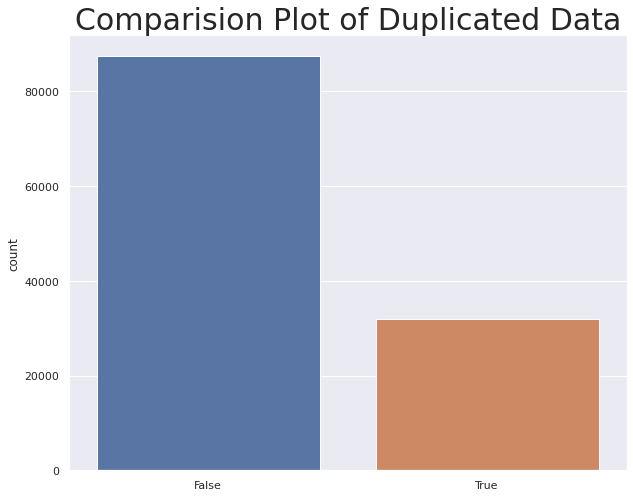

In [121]:
plt.figure(figsize=(10,8))
plt.title('Comparision Plot of Duplicated Data',size=30)
sns.countplot(x=df.duplicated())


In [122]:
# Dropping the Duplicates

df = df.drop_duplicates()

In [123]:
# verifying the total duplicates again\

df.duplicated().sum()

0

## **<font color=darkblue>NULL values operations**

**Checking the occurence of NULL values**

In [124]:
# Checking the occurence of NULL values

df.isnull().sum().reset_index()

,index,0
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


**Visualising the Null values quantity with respect to the Dataset Using 'missingno' library**

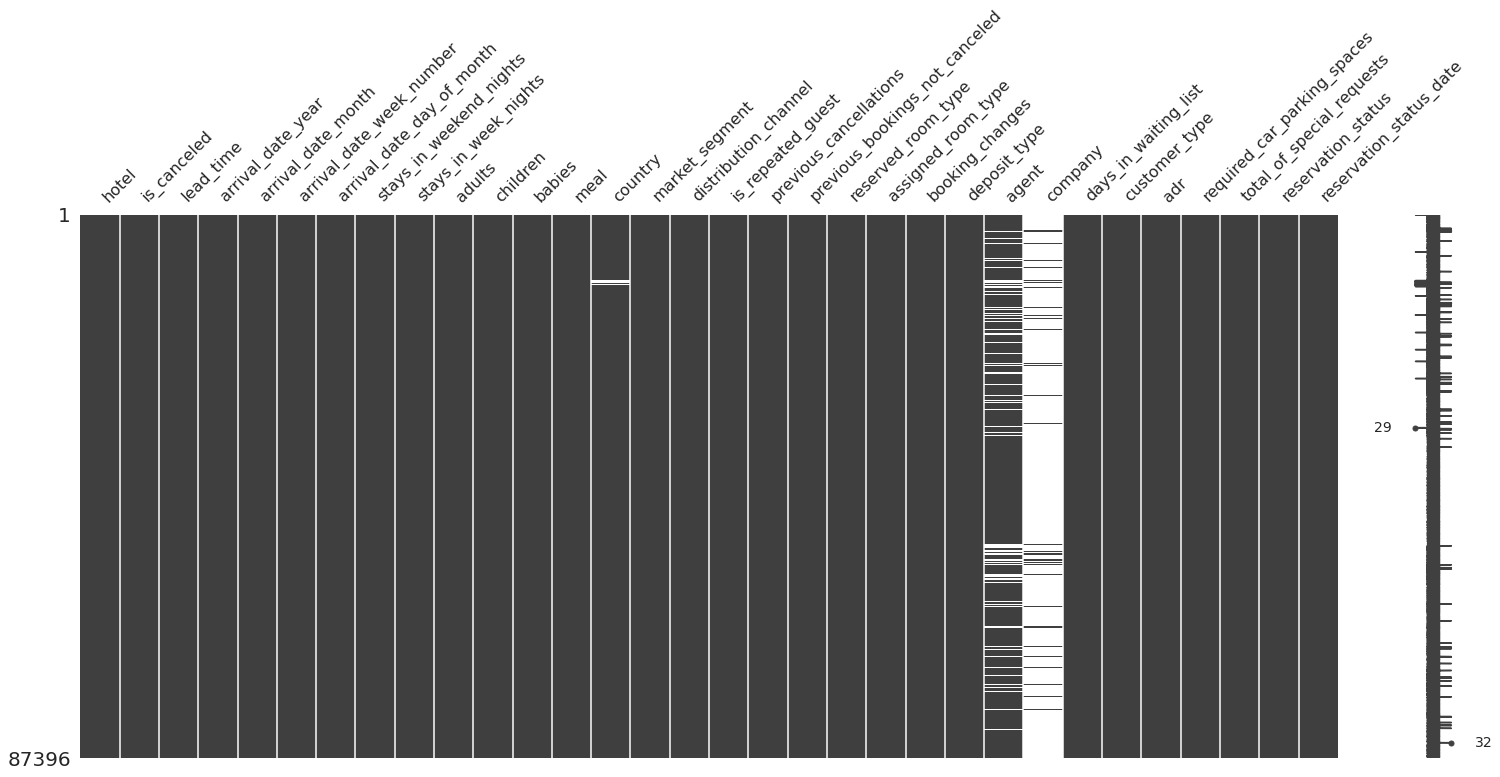

In [125]:
ms.matrix(df)

## **<font color=darkblue>DROPPING 2 columns which has a lot of NULL values**

In [126]:
df.isna().sum().sort_values(ascending=False)[:5].reset_index()

,index,0
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0


In [127]:
# DROPPING the column with most missing values 

df.drop(['company','agent'],axis=1,inplace=True)

In [128]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **<font color=darkblue>Replacing Null values with MODE for babies column since the number is very small**


In [129]:
# df['children'].fillna(df['children'].mode(),inplace=True)

df.children.fillna(df.children.mode,inplace=True)

In [130]:
df.children.isna().sum()

0

In [131]:
df.isna().sum().sort_values(ascending=False)[:5].reset_index()

,index,0
0,country,452
1,hotel,0
2,is_repeated_guest,0
3,reservation_status,0
4,total_of_special_requests,0


## **<font color=darkblue>Replacing NaN values with 'Others' for 'country' column**


In [132]:
# NaN value count in the Country column

df.country.isna().sum()

452

**Since there are only 488 missing data in the country column we can just replace all those with 'Others' by generalizing them all**

In [133]:
# Replace Operation

df['country'].fillna('others',inplace=True)

**Since there are only 488 missing data in the country column we can just replace all those with 'Others' by generalizing them all**

In [134]:
# NO MORE NULL VALUES WE CAN NOW START ANALYSING THE DATA

df.isnull().sum().reset_index()

,index,0
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


# **<font color=darkblue>Exploratory Data Analysis:**

##**1.Which Hotel Type is more used**

### **Visualising Annual Hotel Booking between City hotels and Resort hotels**

In [135]:
# Finding the Total Types of Hotels

df.hotel.unique().tolist()

['Resort Hotel', 'City Hotel']

**SO there are two types of Hotels in the Dataset and we will check what is the total number of Hotels in the Dataset.**
 
**Now to get the Value Count of each type of the Hotel in the Dataset** 

In [136]:
df.hotel.value_counts().reset_index()

,index,hotel
0,City Hotel,53428
1,Resort Hotel,33968


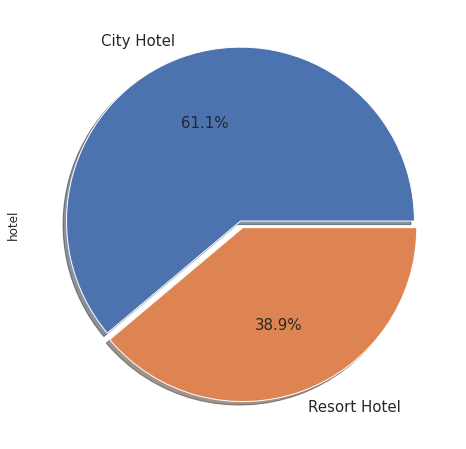

In [234]:
# sns.countplot(x=df.hotel)

df['hotel'].value_counts().plot(kind='pie',autopct='%0.1f%%',explode=[0.02,0.02],figsize=(12,8),fontsize=15,shadow=True)

###**So there are a Lot more of City hotels then there are Resort Hotels** 

In [138]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

###**Using Arrival Date Month Comparing how many Bookings were made for Hotels to Compare**


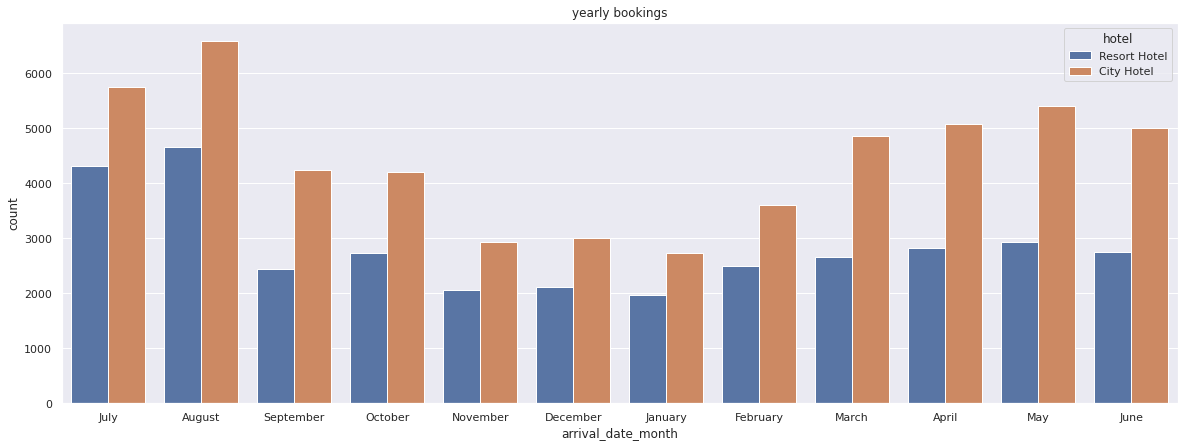

In [237]:
# Using Arrival Date Month Comparing how many Bookingd were made for Hotels to Compare
sns.countplot (x= 'arrival_date_month', data= df, hue= 'hotel').set_title ('yearly bookings')
# plt.title('yearly bookings')
plt.rcParams['figure.figsize'] = (20, 7)


### **Observation**
### **1.As per the Observations we can conclude that City Hotels had more bookings then the Resort Hotels.**
### **2.Since it is more easily accessible Guests prefer to use City Hotels more then Resort hotels**

## **2.Which Country the Guests are coming from to the Hotels.**

In [140]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [141]:
df.country.value_counts(normalize=True)[:15].reset_index()

,index,country
0,PRT,0.314122
1,GBR,0.119376
2,FRA,0.101114
3,ESP,0.082979
4,DEU,0.061639
5,ITA,0.035082
6,IRL,0.034510
7,BEL,0.023811
8,BRA,0.022827
9,NLD,0.021866


**Pie Chart will be very hard to read so lets create a Bar Plot of top ten Countries with most guest count**

In [142]:
df.country.value_counts()[:15].reset_index()

,index,country
0,PRT,27453
1,GBR,10433
2,FRA,8837
3,ESP,7252
4,DEU,5387
5,ITA,3066
6,IRL,3016
7,BEL,2081
8,BRA,1995
9,NLD,1911


Text(0, 0.5, 'Number of Guests')

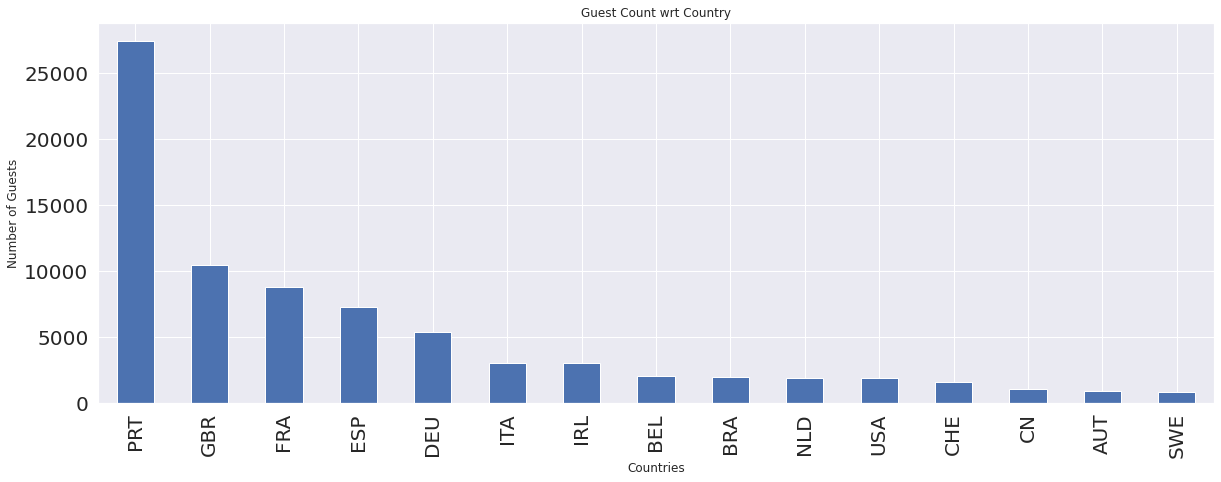

In [239]:
df.country.value_counts()[:15].plot(kind='bar',fontsize=20)
plt.title('Guest Count wrt Country')
plt.xlabel('Countries')
plt.ylabel('Number of Guests')


### **Observation**
### **1.As per the Observations we can see the list of countries with most of the guests are from**
### **2.As per the report Portugal is the country with most guests followed by Britain & France**

## **3.How many cancellations in both types of hotel.**

In [144]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [145]:
df.is_canceled.value_counts().reset_index()

,index,is_canceled
0,0,63371
1,1,24025


In [146]:
df.is_canceled.value_counts(normalize=True).reset_index()

,index,is_canceled
0,0,0.725102
1,1,0.274898


**Total cancellation in the Dataset is 24025 about 27.48%**

##**4.To create a plot to see how many cancellations with respect to City Hotel and Resort Hotel**

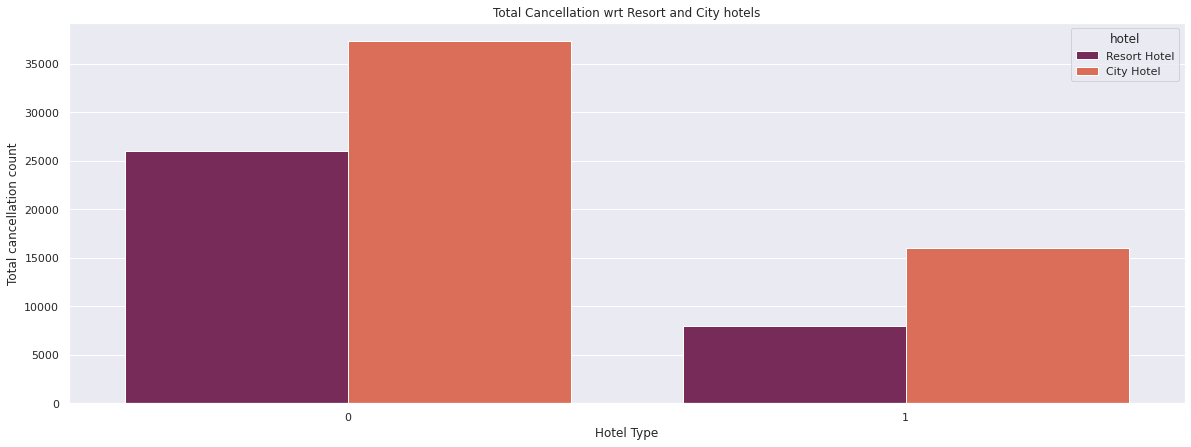

In [147]:
sns.set(style = "darkgrid")

sns.countplot(x='is_canceled', hue='hotel',data=df,palette="rocket")
plt.title("Total Cancellation wrt Resort and City hotels")
plt.xlabel("Hotel Type")
plt.ylabel("Total cancellation count")
plt.rcParams['figure.figsize'] = (12, 5)

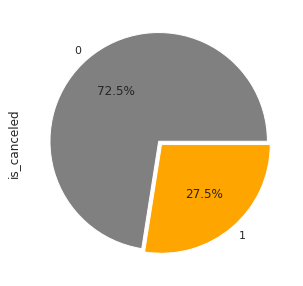

In [148]:
col=['grey','orange']
df['is_canceled'].value_counts().plot(kind='pie', explode=(0.02,0.02), autopct='%1.1f%%',colors=col)

**27.48% Cancellations**

In [149]:
df.is_canceled.value_counts().reset_index()

,index,is_canceled
0,0,63371
1,1,24025


**How many cancellations for Resort Hotels and City Hotels**

In [150]:
# Create a DF of only Cancelled Data

Total_cancelled = df[df['is_canceled']==1]

In [151]:
Total_cancelled.groupby('hotel').size().reset_index()

,hotel,0
0,City Hotel,16049
1,Resort Hotel,7976


Text(0.5, 0, 'Hotels')

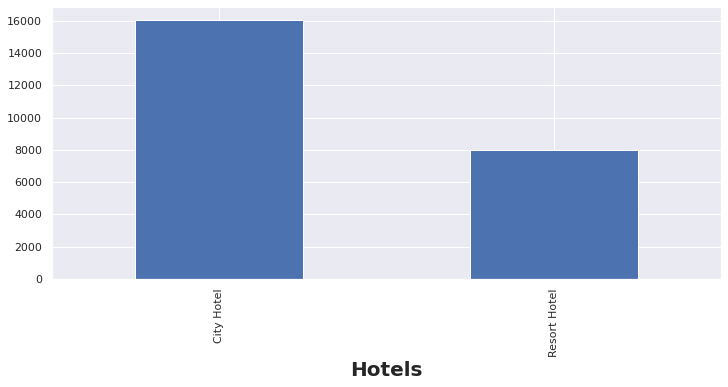

In [152]:
Total_cancelled.groupby('hotel').size().plot(kind='bar')
plt.xlabel('Hotels',fontsize=20,fontweight='bold')

Text(0.5, 0, 'Hotels')

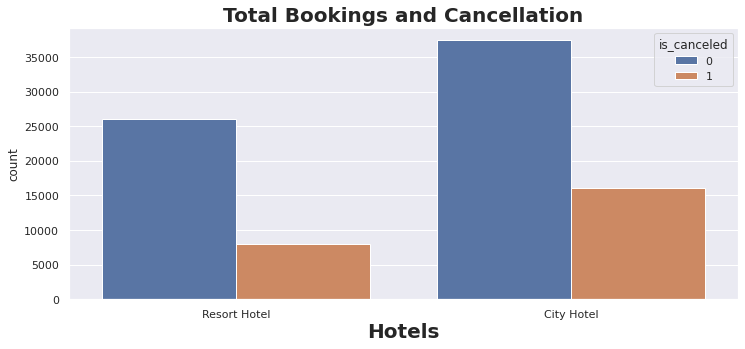

In [153]:
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.title("Total Bookings and Cancellation",fontweight="bold", size=20)
plt.xlabel('Hotels',fontsize=20,fontweight='bold')


In [216]:

Total_cancelled.groupby('hotel').size().reset_index()


,hotel,0
0,City Hotel,16049
1,Resort Hotel,7976


In [217]:
df.is_canceled.value_counts(normalize=True).reset_index()

,index,is_canceled
0,0,0.725102
1,1,0.274898


### **Observation**
### **1.27.48% of the total bookings were cancelled**
### **2.As per the Observations City Hotels has 16049 cancellations**
### **3.As per the Observations Resort Hotels has 7976 cancellations**

## **5.Which Type of Rooms is getting Booked**

In [156]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

**There are a total of 10 Room Types**

**Total Count of the Roomms Booked with respect to Type**

In [157]:
df.reserved_room_type.value_counts().reset_index()

,index,reserved_room_type
0,A,56552
1,D,17398
2,E,6049
3,F,2823
4,G,2052
5,B,999
6,C,915
7,H,596
8,L,6
9,P,6


In [158]:
df.reserved_room_type.value_counts(normalize=True).reset_index()

,index,reserved_room_type
0,A,0.647078
1,D,0.199071
2,E,0.069214
3,F,0.032301
4,G,0.023479
5,B,0.011431
6,C,0.010470
7,H,0.006820
8,L,0.000069
9,P,0.000069


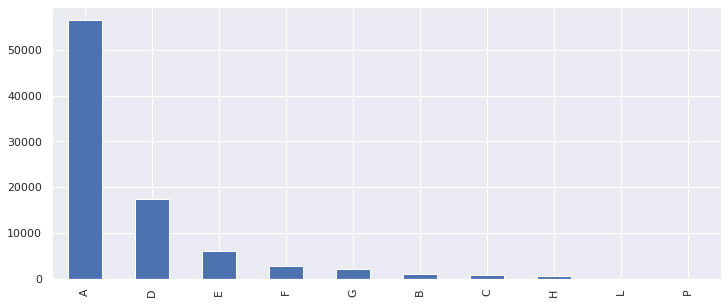

In [159]:
df.reserved_room_type.value_counts().plot(kind='bar')

### **Observation**
### **1.Most of the Guests Book room type 'A' which is 64.70% with 56552 bookings**
### **2.Second with type 'D' with 17398 bookings and type E with 6049 bookings**
### **3.Room type 'L' and 'P' is booked very few times with only 6 booking**



##**6.How the Room is Booked**

In [160]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [161]:
print(df.market_segment.unique().tolist())

['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']


In [162]:
df.market_segment.nunique()

8

**There are a total of 8 different Marketting segments**

In [218]:
df.market_segment.value_counts().reset_index()

,index,market_segment
0,Online TA,51618
1,Offline TA/TO,13889
2,Direct,11804
3,Groups,4942
4,Corporate,4212
5,Complementary,702
6,Aviation,227
7,Undefined,2


In [219]:
df.market_segment.value_counts(normalize=True).reset_index()

,index,market_segment
0,Online TA,0.590622
1,Offline TA/TO,0.158920
2,Direct,0.135063
3,Groups,0.056547
4,Corporate,0.048194
5,Complementary,0.008032
6,Aviation,0.002597
7,Undefined,0.000023


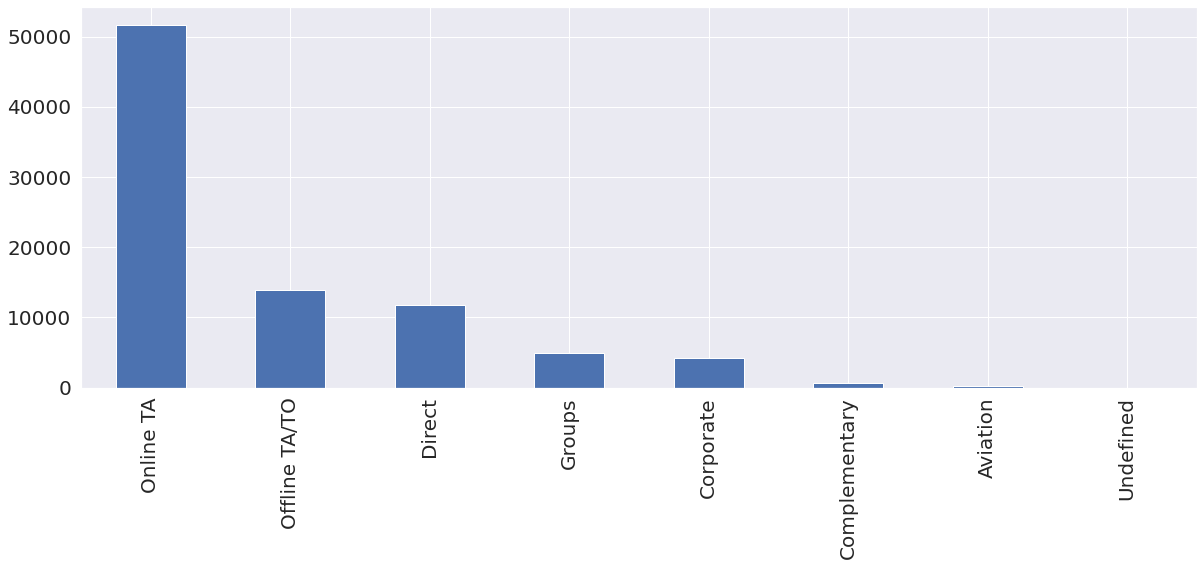

In [241]:
df.market_segment.value_counts().plot(kind='bar',fontsize=20)

### **Observation**
### **1.Most of the Guests are from 'Online TA' which is 59.06% with 51618 bookings**
### **2.Followed by 'Offline TA' and 'direct' are almost same at 15.89 and 13.5%**

## **7.Which distribution channel contributes most to ADR**

In [166]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [167]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [168]:
df.adr.value_counts().reset_index().sort_values('adr',ascending=False)

,index,adr
0,0.00,1778
1,75.00,1320
2,65.00,1260
3,48.00,878
4,85.00,858
...,...,...
6024,87.58,1
6025,101.55,1
6026,196.07,1
6027,69.09,1


In [169]:
df_adr=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()


Text(0.5, 1.0, 'ADR wrt Distribution Channels')

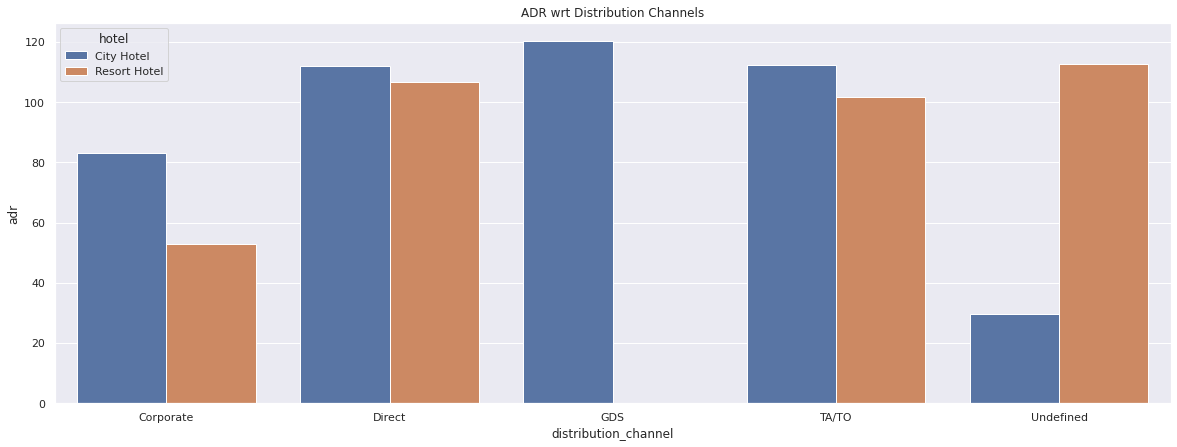

In [245]:
sns.barplot(x='distribution_channel', y='adr', data=df_adr, hue='hotel')
plt.title('ADR wrt Distribution Channels')

In [171]:
df_adr.sort_values(by='adr',ascending=False)

,distribution_channel,hotel,adr
4,GDS,City Hotel,120.317845
8,Undefined,Resort Hotel,112.700000
5,TA/TO,City Hotel,112.426347
2,Direct,City Hotel,112.092246
3,Direct,Resort Hotel,106.523946
6,TA/TO,Resort Hotel,101.553533
0,Corporate,City Hotel,83.265884
1,Corporate,Resort Hotel,52.972522
7,Undefined,City Hotel,29.625000


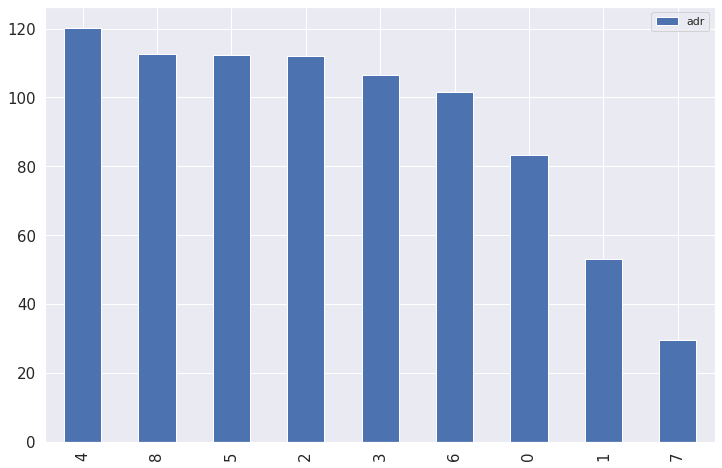

In [246]:
df_adr.sort_values('adr',ascending=False).plot(kind='bar',figsize=(12,8),fontsize=15)


In [173]:
df.adr.mean()

106.33724644148474

### **Observation**
### **1.Most of the ADR is contributed by GDS and TA and Direct**
### **2.Most of the Guests are Booking from 'GDS' and in most cases the City hotels gets more bookings**
### **3.Undefined- Bookings are undefined so most probable bookings are on arrival.**

## **8.Deposit type for the Booking**

In [174]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [220]:
df.deposit_type.value_counts().reset_index()

,index,deposit_type
0,No Deposit,86251
1,Non Refund,1038
2,Refundable,107


In [221]:
df.deposit_type.value_counts(normalize=True).reset_index()

,index,deposit_type
0,No Deposit,0.986899
1,Non Refund,0.011877
2,Refundable,0.001224


### **Observation**
### **1.87.64% of the people don't make a Deposit with 104641 records**
### **2.12.21% of the people make non refundable deposits with 14587**


## **9.Meal statistics from the hotels**

In [177]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [178]:
df.meal.value_counts().reset_index()

,index,meal
0,BB,67978
1,SC,9481
2,HB,9085
3,Undefined,492
4,FB,360


In [179]:
df.meal.value_counts(normalize=True).reset_index()

,index,meal
0,BB,0.777816
1,SC,0.108483
2,HB,0.103952
3,Undefined,0.005630
4,FB,0.004119


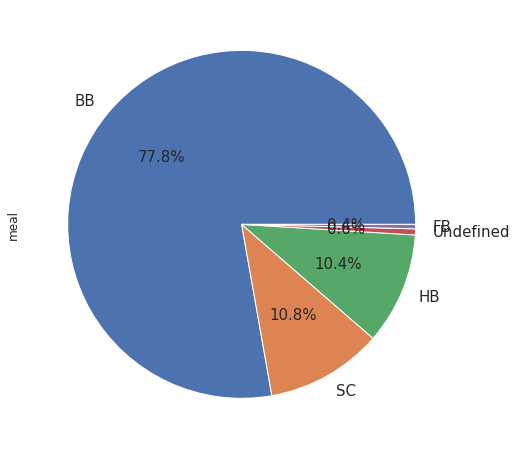

In [180]:
df.meal.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(12,8),fontsize=15)

### **Observation**
###**1.Out of the meals, BB (Bed & Breakfast) is the most ordered meal which is around 77.31%, followed by HB(Half Board), SC(no meal package), Undefined and FB (Full Board)**

## **10.How many Guests are repeated guests**

In [181]:
df['is_repeated_guest'].value_counts().reset_index()

,index,is_repeated_guest
0,0,83981
1,1,3415


In [182]:
df['is_repeated_guest'].value_counts(normalize=True).reset_index()

,index,is_repeated_guest
0,0,0.960925
1,1,0.039075


In [183]:
rg_df=df[df['is_repeated_guest']==1].groupby('hotel').size().reset_index()
print(rg_df.sum())
rg_df


hotel    City HotelResort Hotel
0                          3415
dtype: object


,hotel,0
0,City Hotel,1708
1,Resort Hotel,1707


### **Observation**
### **1.96.80% of the guests are not repeated guest**
### **2.Only 3.19% of the guests are repeated guest with 3810 guests in which 2032 are for City Hotels and 1778 for Resort Hotels**


##**11.Customer Types**

In [184]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [185]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [186]:
df.customer_type.value_counts().reset_index()

,index,customer_type
0,Transient,71986
1,Transient-Party,11727
2,Contract,3139
3,Group,544


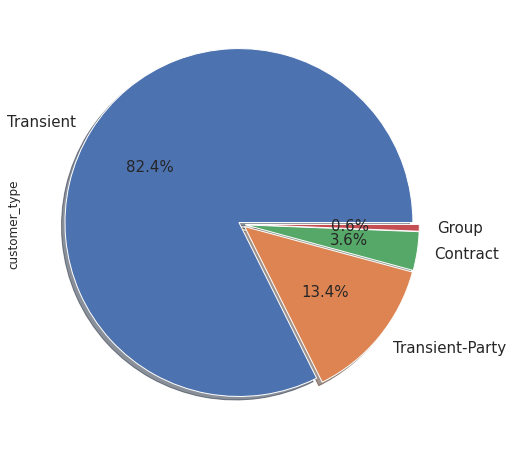

In [187]:
df.customer_type.value_counts(normalize=True).plot(kind='pie',explode=[0.02,0.02,0.02,0.02],shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15)

In [188]:
df.customer_type.value_counts(normalize=True).reset_index()

,index,customer_type
0,Transient,0.823676
1,Transient-Party,0.134182
2,Contract,0.035917
3,Group,0.006225


### **Observation**
### **1.75.05% of the guests are Transient guests**
### **2.Followed with 21.04% of Transient-Party and 3.41% Contract**


## **12.No of travellers in Various Months**

In [189]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [225]:
df.arrival_date_month.value_counts().reset_index()


,index,arrival_date_month
0,August,11257
1,July,10057
2,May,8355
3,April,7908
4,June,7765
5,March,7513
6,October,6934
7,September,6690
8,February,6098
9,December,5131


In [223]:
df.arrival_date_month.value_counts(normalize=True).reset_index()

,index,arrival_date_month
0,August,0.128805
1,July,0.115074
2,May,0.095599
3,April,0.090485
4,June,0.088848
5,March,0.085965
6,October,0.079340
7,September,0.076548
8,February,0.069774
9,December,0.058710


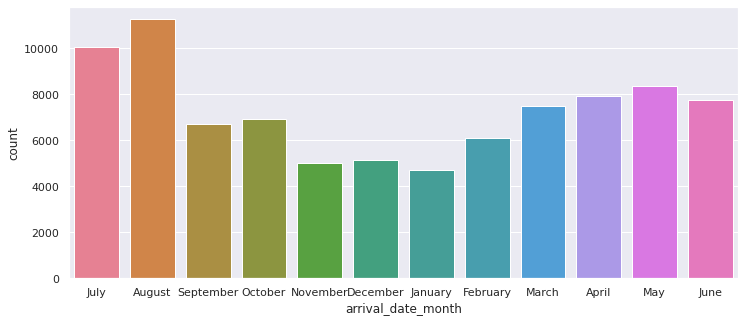

In [191]:
sns.countplot(x=df['arrival_date_month'], palette='husl')


### **Observation**

### **1.August month had most travellers with 12.88% which is 13877 guests**
### **2.Followed by July with 11.5% which is 10057 guests, followed next by May and October with 8355 and 7908 guests**


## **13.Stay During Weekends**

In [192]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [193]:
df.stays_in_weekend_nights.unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

**Total percentage of Weekend Nights**

In [194]:
(df.stays_in_weekend_nights.mean())/2

0.5026316993912765

In [226]:
df.stays_in_weekend_nights.value_counts()[:9].reset_index()

,index,stays_in_weekend_nights
0,0,35151
1,2,26414
2,1,22657
3,4,1734
4,3,1150
5,6,113
6,5,70
7,8,60
8,7,15


In [227]:
df.stays_in_weekend_nights.value_counts(normalize=True)[:9].reset_index()

,index,stays_in_weekend_nights
0,0,0.402204
1,2,0.302234
2,1,0.259245
3,4,0.019841
4,3,0.013158
5,6,0.001293
6,5,0.000801
7,8,0.000687
8,7,0.000172


Text(0.5, 0, 'Total Count')

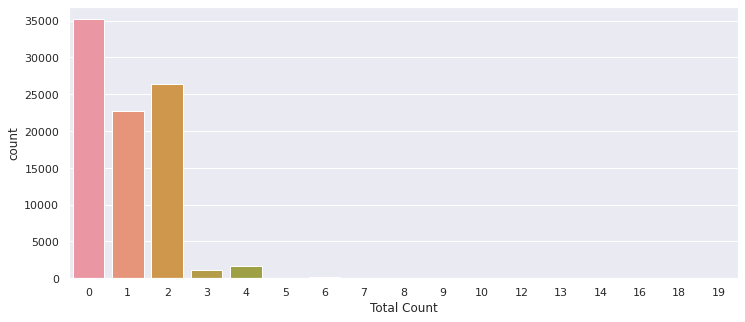

In [196]:
sns.countplot(x=df.stays_in_weekend_nights,data=df)
plt.xlabel("Stays in Weekend Nights")
plt.xlabel("Total Count")


### **Observation**
### **1.50.26% of the travellers were during Weekend**
### **2.Most of the time people stayed 2 to 1 days during Weekend**


## **14.Stay During Week days**

In [200]:
df.stays_in_week_nights.unique()

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

In [229]:
(df.stays_in_week_nights.mean())/5

0.5250789509817383

In [230]:
df.stays_in_week_nights.value_counts()[:13].reset_index()

,index,stays_in_week_nights
0,1,22191
1,2,20744
2,3,16259
3,5,9663
4,4,7874
5,0,6175
6,6,1379
7,10,972
8,7,967
9,8,613


In [231]:
df.stays_in_week_nights.value_counts(normalize=True)[:13].reset_index()

,index,stays_in_week_nights
0,1,0.253913
1,2,0.237356
2,3,0.186038
3,5,0.110566
4,4,0.090096
5,0,0.070655
6,6,0.015779
7,10,0.011122
8,7,0.011065
9,8,0.007014


Text(0.5, 0, 'Total Count')

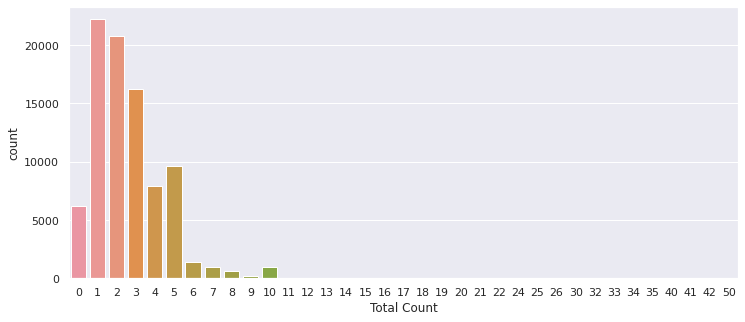

In [203]:
sns.countplot(x=df.stays_in_week_nights,data=df)
plt.xlabel("Stays in Week days Night")
plt.xlabel("Total Count")


In [204]:
weekend_df=df.groupby(['stays_in_weekend_nights','hotel']).mean().reset_index()
weekday_df=df.groupby(['stays_in_week_nights','hotel']).mean().reset_index()
weekend_df1=df.groupby(['stays_in_weekend_nights','stays_in_week_nights','hotel']).mean().reset_index()


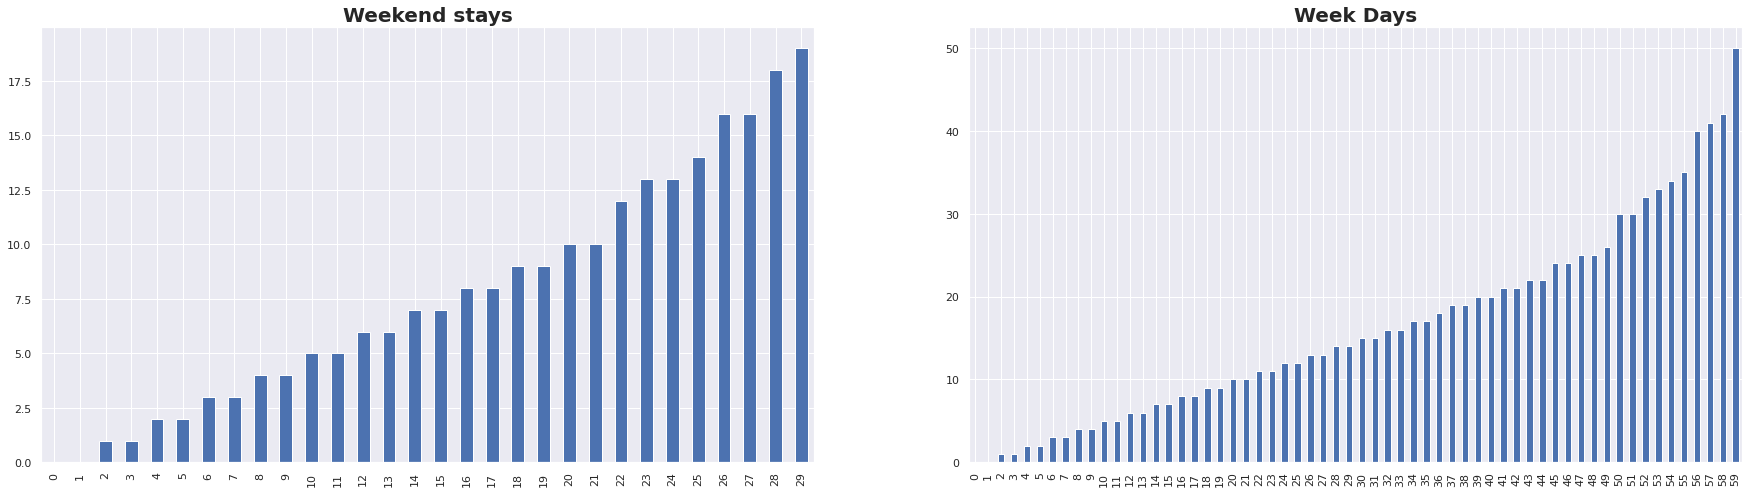

In [205]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
weekend_df.stays_in_weekend_nights.plot(kind='bar')
plt.title('Weekend stays',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
weekday_df.stays_in_week_nights.plot(kind='bar')
plt.title('Week Days',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

### **Observation**
### **1.52.50% of the travellers were during Weekend**
### **2.Most of the time people stayed 1 day and followed by 2 and 3 days during Week days**


## **15.Quantity of people who stayed in Which Rooms**

In [232]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'overall_stay']


In [207]:
df.adults.unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [233]:
df.adults.value_counts(normalize=True).reset_index()

,index,adults
0,2,0.737986
1,1,0.188830
2,3,0.067909
3,0,0.004405
4,4,0.000687
5,26,0.000057
6,27,0.000023
7,20,0.000023
8,5,0.000023
9,40,0.000011


In [209]:
len(df['adults'])

87396

In [210]:
actual_single = len(df[df['adults']==1])
actual_single

16503

### **Observation**

### **1. There were 16503 Single rooms bookings made which is 18.88% of total bookings**

## **16.Optimal Stay for Guests**

In [211]:
df['overall_stay']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [249]:
guest_stays = df.groupby(['overall_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel


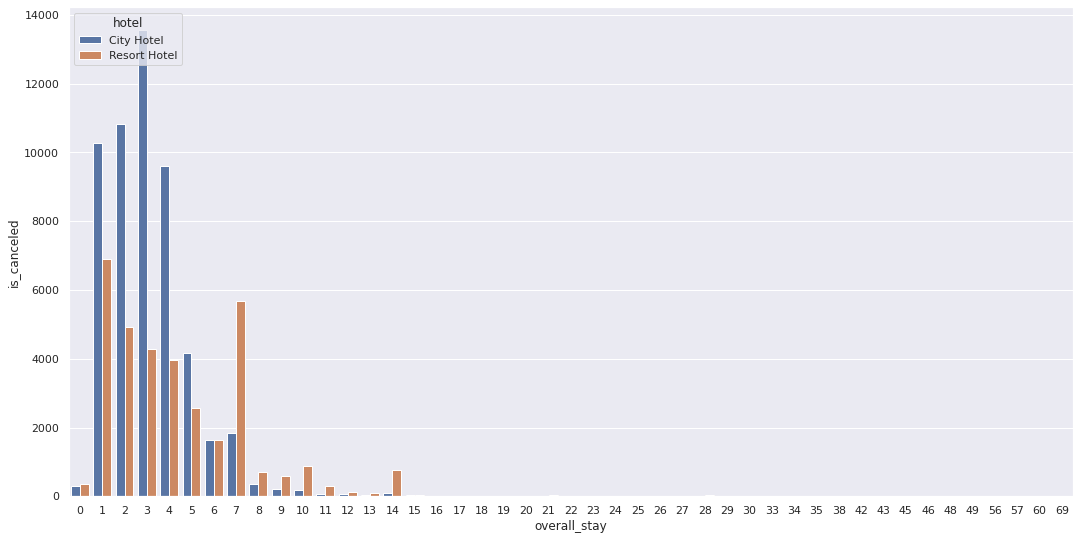

In [250]:
plt.figure(figsize=(18,9))
sns.barplot(x='overall_stay',y='is_canceled',hue='hotel',data=guest_stays)

### **Observation:**
### **1.So most of the people stay 1 to 4 days and very rarely they stay above a week**

## **17.The Correlation Heatmap of the Dataset**

In [214]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,overall_stay
is_canceled,1.000000,0.184806,0.088030,0.001443,0.005328,0.060191,0.082928,0.081816,-0.020543,-0.089643,0.051468,-0.052154,-0.093644,0.004464,0.127986,-0.184206,-0.120545,0.084102
lead_time,0.184806,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,-0.003614,-0.147003,0.005375,-0.078931,0.077028,0.132152,0.023564,-0.086541,0.034240,0.318272
arrival_date_year,0.088030,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,-0.023334,0.024343,-0.054212,0.027256,0.008604,-0.027939,0.176088,-0.039807,0.064268,0.004630
arrival_date_week_number,0.001443,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.014260,-0.036860,0.007199,-0.020819,0.011902,0.013843,0.098279,0.008946,0.046599,0.030693
arrival_date_day_of_month,0.005328,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,-0.000393,-0.004178,-0.008538,0.000152,0.006307,0.006588,0.022591,0.009167,-0.001651,-0.027597
stays_in_weekend_nights,0.060191,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.013668,-0.106948,-0.020636,-0.056653,0.050316,-0.031680,0.038972,-0.042920,0.032396,0.786262
stays_in_week_nights,0.082928,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.016009,-0.113543,-0.018781,-0.058503,0.085044,0.001905,0.053298,-0.044303,0.037823,0.950577
adults,0.081816,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.016640,-0.171714,-0.042097,-0.120914,-0.048061,-0.015740,0.248999,0.007802,0.112772,0.103992
babies,-0.020543,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,1.000000,-0.012977,-0.005395,-0.009193,0.081035,-0.006840,0.023446,0.030885,0.094820,0.017000
is_repeated_guest,-0.089643,-0.147003,0.024343,-0.036860,-0.004178,-0.106948,-0.113543,-0.171714,-0.012977,1.000000,0.206374,0.441456,0.006047,-0.012816,-0.153040,0.072019,-0.001321,-0.124313


Text(0.5, 1.0, 'Correlation Heatmap for the Dataset ')

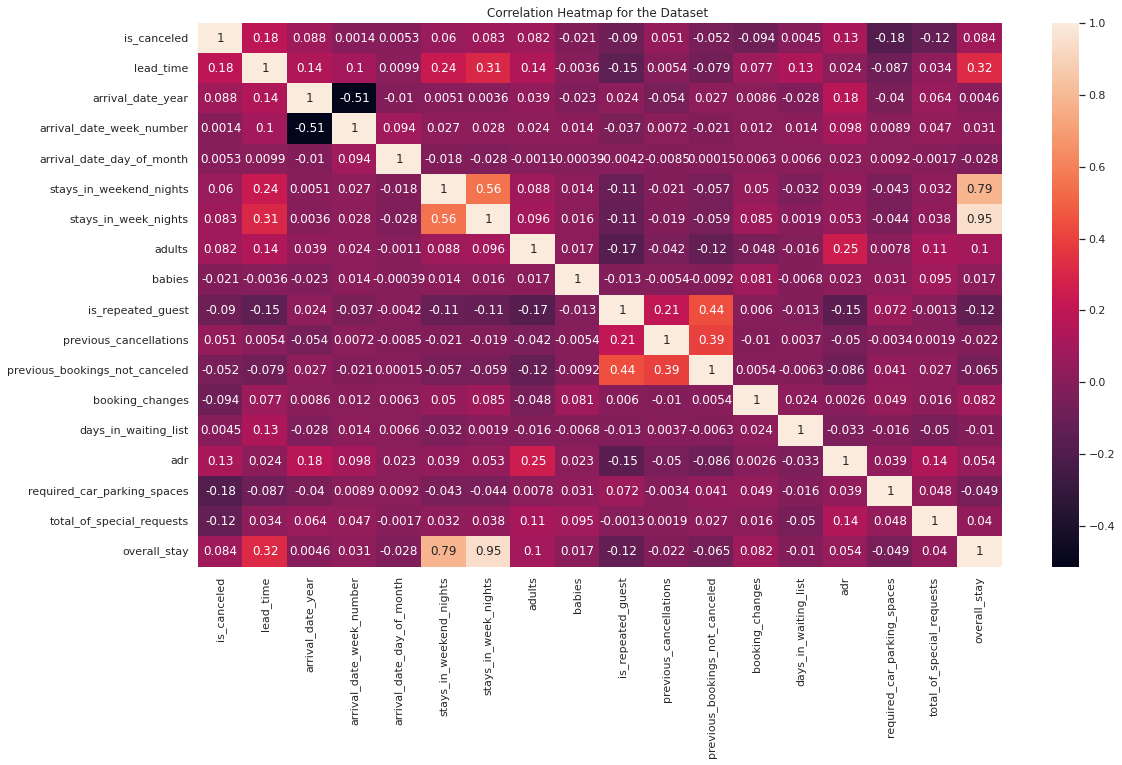

In [215]:
plt.figure(figsize=(18,10))

sns.heatmap(df.corr(),annot=True)
# plt.figure(figsize=(18,10))
plt.title("Correlation Heatmap for the Dataset ")

## **"Previous bookings not canceled" has 44% Correlation with "is repeated guest" which shows that those who has not cancelled their previous booking has more probability to be a Repeated Guest**
## **"Stays in week nights" and "Stays in weekend nights" has very high correlation with Overall stay**


#**<font color=darkblue>Conclusion:**

# **Regarding the Dataset**

## 1.Initially The Dataset Had 119390 Rows with 32 Columns
## 2.The Dataset had 31994 Duplicate values and a visualization has been    plotted to see the quantity of Duplicated Values and dropped from dataset
## 3.Some 'Null' values were found in the dataset
## 4.Columns 'COMPANY' and 'AGENT' were dropped and for Null values in Children Column is filled with the Mode of that column and for country column Nan values are replaced with 'Others'

# **DATA INSIGHTS**

## 1. City hotels were more preffered by the guests because it is more easily accessible.
## 2. Portugal country has most guests with 31.41% followed by Britain=11.93 & France=10.11
## 3. 27.48% of total bookings were cancelled which is 24025 cancellations
## 4. City hotels have 16049 cancellations which is more then Resort hotels which had 7976
## 5. Type 'A' room was booked 64.70% with 56552 bookings followed by type 'D' with 17398 bookings and type E with 6049 bookingsRoom type 'L' and 'P' is booked very few times with only 6 booking
# 6. Most of the Guests are using 'Online TA' which is 59.06% with 51618 bookings Followed by 'Offline TA' and 'direct' are almost same at 15.89% and 13.5%
## 7. Most of the ADR is contributed by GDS and TA and Direct reservations
# 8. 98.68% of the guests did not make a Deposit and very few made Non refundable deposits
## 9. 77.31% of the guests order Bed & Breakfastal and around 10% of the guests select Half Board and 10% don't opt for meal packages 
## 10. Only 3.19% of the guests were repeated guests with only 3810 of total guests 
## 10.1. Resort hotels had more repeated guests then City hotels
## 11. 75.05% of the guests are Transient guests and 21.04% are Transient-Party guests
## 12. August month had most travellers with 12.88% which is 13877 guests
## 12.1. July and May has the next most travellers with 10057 and 8355 guests
## 13. 50.26% of total guests stay in Hotels during Weekend
## 13.1. Most of the guests stay 2 days or 1 day during Weekend
## 14. 25.39% of the guests stay only 1 day during Weekdays and 23.73% guests stay for 2 days and 18% stay 3 days during Weekdays, Most of the guests stay 1 day Very negligable percentage of guests stay above 3 days
## 15. 19% of the bookings made were for Single Rooms
## 16. Guests who has not cancelled their previous booking has more probability to be a Repeated Guest

# **Improvement Ideas**

## 1.   Resort hotels can increase their business by improving transportation availability for guests
## 2.   Improve marketting in countries which have very low guest counts
## 3.   Mandate deposits to prevent cancellations
## 4.   Improve and advertise the other types of rooms which are not getting booked
## 5.   Try to convert Other rooms to Type A room which is preffered most
## 6.   Give attractive discounts to increase repeated guests
## 7.   Create attractions in other months to improve business
## 8.   Give Discount offers if anyone is staying over 7 days to get a stable income


